In [1]:
data_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv' 

#for an insurance company

In [2]:
from urllib.request import urlretrieve

urlretrieve(data_url , 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x105b06ee0>)

In [3]:
import pandas as pd

medical_df = pd.read_csv('medical.csv')

medical_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
import jovian


/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/jovian/utils/latest.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


<IPython.core.display.Javascript object>

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [8]:
age_plot = px.histogram( medical_df , x='age' , title= "Age distribution" , marginal= 'box' , nbins = 47)
age_plot.update_layout(bargap = 0.06)
age_plot.show()


In [9]:
bmi = px.histogram(medical_df , x = 'bmi' , title="Body Mass Index Dist" , marginal='box')
bmi.update_layout(bargap = 0.02)
bmi.show()

In [10]:
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [12]:
gender_smokers = px.histogram(medical_df , x = 'smoker' , color = 'sex')
gender_smokers.show()

In [13]:
age_charge = px.scatter(medical_df , x = 'age' , y='charges' , color = 'smoker')
age_charge.show()

In [14]:
bmi_charge = px.scatter(medical_df , x = 'bmi' , y = 'charges', color = 'smoker')
bmi_charge.show()

In [15]:
medical_df.corr(numeric_only="True")

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [16]:
smoker_values = {"yes":1 , "no" :0 }
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984772)

<Axes: >

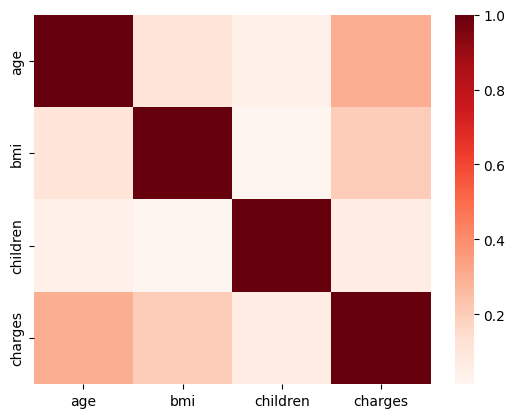

In [17]:
sns.heatmap(medical_df.corr(numeric_only=True) , cmap = "Reds")

<Axes: xlabel='age', ylabel='charges'>

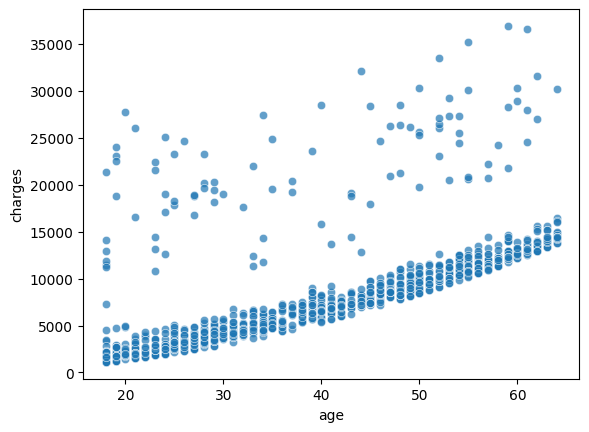

In [18]:
non_smokers = medical_df[medical_df.smoker == 'no']
sns.scatterplot(non_smokers , x="age" , y="charges" , alpha = 0.7)

In [19]:
def estimate_charges(age , w , b) :
    return w *age + b 

In [20]:
w = 200
b = 0

ages = non_smokers.age
estimsted_charges = estimate_charges(ages , w , b)


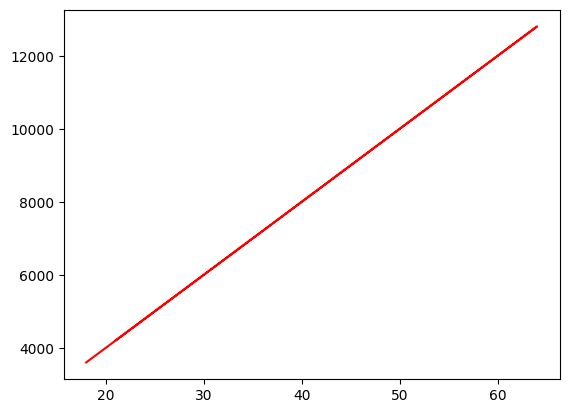

In [21]:
plt.plot(ages , estimsted_charges , color= "red" )
plt.xlabel = "Ages"
plt.ylabel = "Charges"

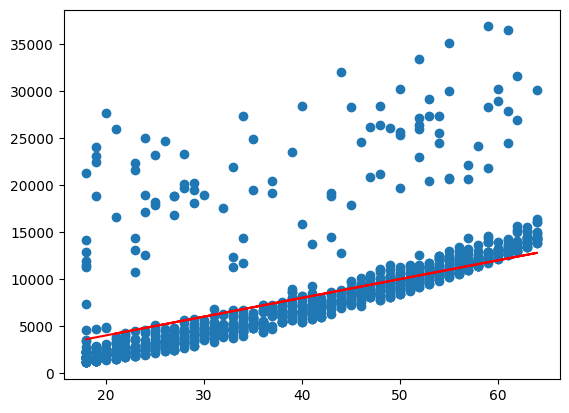

In [22]:
target = non_smokers.charges

plt.xlabel = "Age"
plt.ylabel = "Charges"
plt.scatter(ages  ,target  )
plt.plot(ages , estimsted_charges , color = 'r')




In [23]:
import numpy as np

In [24]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [25]:
def try_parameters(w, b):
    ages = non_smokers.age
    target = non_smokers.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel='Age'
    plt.ylabel='Charges'
    plt.legend(['Estimate', 'Actual'])

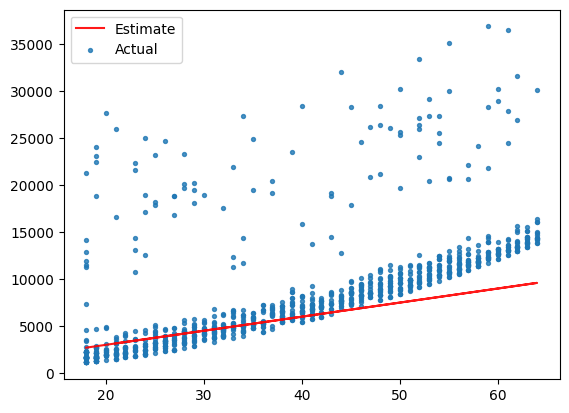

In [26]:
try_parameters(150 , 0)

In [27]:
rmse(target,estimsted_charges)

np.float64(4790.154131157637)

In [28]:
def try_parameters(w, b):
    ages = non_smokers.age
    target = non_smokers.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8,alpha=0.8)
    plt.xlabel='Age'
    plt.ylabel='Charges'
    plt.legend(['Estimate', 'Actual'])

    loss = rmse(target , estimated_charges)

    print("RMSE loss = " , loss)

RMSE loss =  4734.586555104191


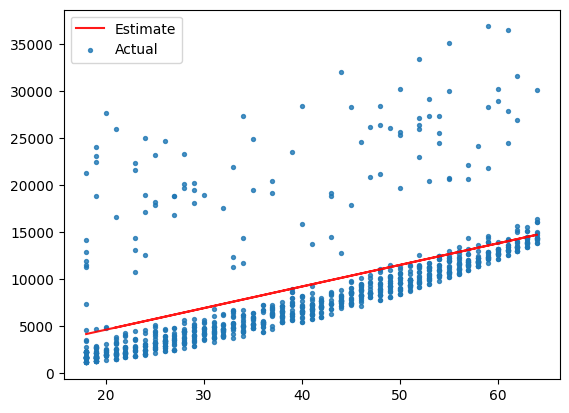

In [29]:
try_parameters(230 , 10)

In [30]:
%pip install scikit-learn --quiet

Note: you may need to restart the kernel to use updated packages.


In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()

In [33]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [34]:
#Note that the input `X` must be a 2-d array, so we'll need to pass a dataframe, instead of a single column.
inputs = non_smokers[['age']]
targets = non_smokers.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [35]:
model.fit(inputs , targets)

LinearRegression()

In [36]:
predicted = model.predict(inputs)
print(predicted)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [37]:
rmse(targets , predicted)

np.float64(4662.505766636395)

In [38]:
print(model.coef_)
print(model.intercept_)

[267.24891283]
-2091.420556565021


RMSE loss =  4662.505766636395


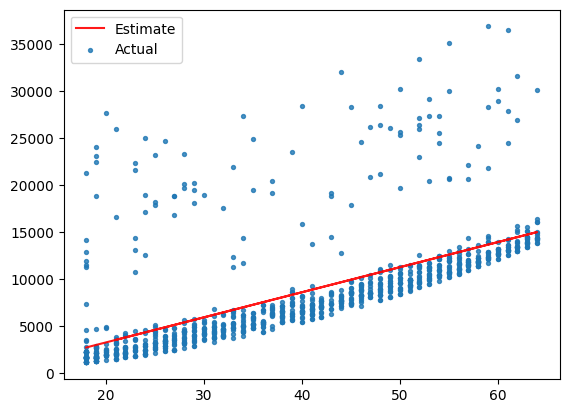

In [39]:
try_parameters(model.coef_ , model.intercept_)

In [40]:
from sklearn.linear_model import SGDRegressor

sgd_model = SGDRegressor()

In [41]:
sgd_model.fit(inputs , targets)
predicted = sgd_model.predict(inputs)

In [42]:
rmse(targets , predicted)

np.float64(4916.137176357431)

RMSE loss =  4916.137176357431


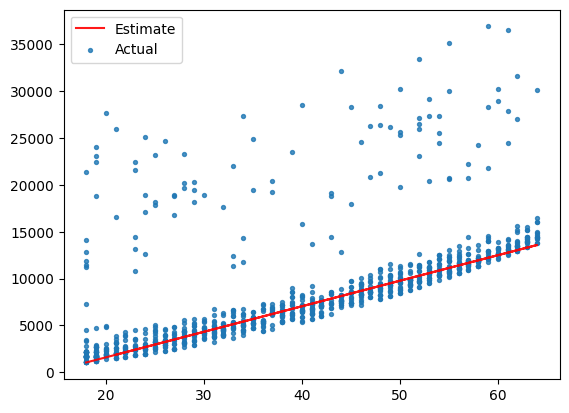

In [43]:
try_parameters(sgd_model.coef_ , sgd_model.intercept_)

In [44]:
arr = np.array([[20],
                [30],
                [40]])

sgd_model.predict(arr)

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([1593.56012641, 4319.24929251, 7044.93845861])

In [75]:
# Create inputs and targets
inputs, targets = non_smokers[['age']], non_smokers['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [77]:
twoinputs , onetargets = non_smokers[['age' , 'bmi']] , non_smokers['charges']

model = LinearRegression().fit(twoinputs , onetargets)

predicted = model.predict(twoinputs)

loss = rmse(targets , predicted)

print("Loss =", loss)

Loss = 4662.3128354612945


/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

divide by zero encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

overflow encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

invalid value encountered in matmul



In [47]:
print(np.isnan(twoinputs).any())
print(np.isinf(twoinputs).any())
print(inputs.shape)
print(targets.shape)
print(inputs.dtypes)



age    False
bmi    False
dtype: bool
age    False
bmi    False
dtype: bool
(1064, 1)
(1064,)
age    int64
dtype: object


In [48]:
fig = px.scatter_3d(non_smokers , x = 'age' , y = 'bmi' , z = 'charges' )
fig.update_traces(marker_size = 3 , opacity = 0.5)
fig.show()

In [49]:
# linear regression based only on bmi

inputs , targets = non_smokers[['bmi']] , non_smokers['charges']

bmi_model = LinearRegression().fit(inputs , targets) 

predicted = bmi_model.predict(inputs)

loss = rmse(targets , predicted)

print("Loss = ", loss)

#Loss will be higher due to even lesser corellation. 



Loss =  5969.772531913293


In [50]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

divide by zero encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

overflow encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

invalid value encountered in matmul



In [52]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [53]:
# Create inputs and targets now added smoker
inputs, targets = medical_df[['age', 'bmi', 'children' , 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

divide by zero encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

overflow encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

invalid value encountered in matmul



In [54]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
print(enc.categories_)

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


In [55]:
onehot = enc.transform(medical_df[['region']]).toarray()
print(onehot)

[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [56]:
medical_df[['northeast' , 'northwest' , 'southeast' , 'southwest']] = onehot
medical_df.head(5)

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0


In [57]:
sex_codes ={ "female" : 0 , "male" : 1}

medical_df['sex_code'] = medical_df['sex'].map(sex_codes)

In [58]:
input_cols = ['age' ,'sex_code' , 'bmi' , 'children' , 'smoker_code' , 'northeast', 'northwest' , 'southeast' , 'southwest']
inputs , target = medical_df[input_cols] , medical_df['charges']

model.fit(inputs , target) 

predicted = model.predict(inputs) 

loss = rmse(target , predicted) 

print("Loss = ", loss)

Loss =  6041.6796511744515


/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

divide by zero encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

overflow encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

invalid value encountered in matmul



In [59]:
smokers = medical_df[medical_df['smoker'] == 'yes']

non_smokers = medical_df[medical_df['smoker'] == 'no'] 


In [60]:
model_ns = LinearRegression()
model_s = LinearRegression()#LR object for smokers only 

input_cols = ['age' ,'sex_code' , 'bmi' , 'children' , 'smoker_code' , 'northeast', 'northwest' , 'southeast' , 'southwest']
target_s = smokers['charges']
target_ns = non_smokers['charges']
model_ns.fit(non_smokers[input_cols] , non_smokers['charges'])
model_s.fit(smokers[input_cols] , smokers['charges'])

predicted_ns = model_ns.predict(non_smokers[input_cols])
predicted_s = model_s.predict(smokers[input_cols])

loss_s = rmse(target_s , predicted_s )
loss_ns = rmse( target_ns , predicted_ns )

print("Loss for smokers = ", loss_s)
print("Loss for non smokers = ", loss_ns)


Loss for smokers =  5668.4678821121515
Loss for non smokers =  4573.074988795492


/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

divide by zero encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

overflow encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

invalid value encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

divide by zero encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

overflow encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

invalid value encountered in matmul



In [61]:
print("Loss for smokers = ", loss_s)
print("Loss for non smokers = ", loss_ns)

Loss for smokers =  5668.4678821121515
Loss for non smokers =  4573.074988795492


In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
numeric_cols = ['age' , 'bmi' , 'children']

scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [64]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [65]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols,1 ),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,sex_code,-131.314359
2,bmi,339.193454
3,children,475.500545
4,smoker_code,23848.534542
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [66]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [67]:
#now we scale the data 

scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [68]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

divide by zero encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

overflow encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

invalid value encountered in matmul



In [69]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [72]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 5708.5825339650855


/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

divide by zero encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

overflow encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

invalid value encountered in matmul



In [73]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 6080.586342050062


/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

divide by zero encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

overflow encountered in matmul

/Users/swapneelpremchand/SciKit-Learn/.venv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning:

invalid value encountered in matmul



# Now we are finally done with liner regression! Learnt a lot!